In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import cv2
import glob

In [ ]:
from IPython.core.display import Image
train_images = glob.glob("/content/drive/MyDrive/udemy_異常検知_画像/data/*")
train_data = []

for i in train_images:
  image = cv2.imread(i)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  train_data.append(image)

train_data = np.array(train_data)
print(train_data)

[[[[135 134 130]
   [136 135 131]
   [137 136 132]
   ...
   [161 157 154]
   [160 156 153]
   [159 155 152]]

  [[135 134 130]
   [136 135 131]
   [138 137 133]
   ...
   [162 158 155]
   [161 157 154]
   [159 155 152]]

  [[135 134 130]
   [136 135 131]
   [138 137 133]
   ...
   [163 159 156]
   [162 158 155]
   [160 156 153]]

  ...

  [[171 171 171]
   [172 172 172]
   [173 173 173]
   ...
   [198 200 199]
   [196 198 197]
   [195 197 196]]

  [[170 170 170]
   [172 172 172]
   [173 173 173]
   ...
   [198 200 199]
   [196 198 197]
   [195 197 196]]

  [[170 170 170]
   [172 172 172]
   [173 173 173]
   ...
   [198 200 199]
   [197 199 198]
   [195 197 196]]]


 [[[144 141 136]
   [145 142 137]
   [147 144 139]
   ...
   [166 161 157]
   [165 160 156]
   [164 159 155]]

  [[144 141 136]
   [145 142 137]
   [147 144 139]
   ...
   [167 162 158]
   [166 161 157]
   [165 160 156]]

  [[144 141 136]
   [145 142 137]
   [147 144 139]
   ...
   [168 163 159]
   [167 162 158]
   [166 161

In [ ]:
train_data.shape

(38, 128, 128, 3)

In [ ]:
train_data = train_data.reshape(train_data.shape[0], -1)
train_data.shape

(38, 49152)

In [ ]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)

In [ ]:
print(train_data[0,:10])

[-0.29414515 -0.33127121 -0.43176449 -0.28900259 -0.32746757 -0.43047119
 -0.30335386 -0.34273454 -0.44877332 -0.19712693]


In [ ]:
model = OneClassSVM()
model.fit(train_data)

OneClassSVM()

In [ ]:
test_images = glob.glob("/content/drive/MyDrive/udemy_異常検知_画像/test_data/*")
test_data_original = []

for i in test_images:
  image = cv2.imread(i)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  test_data_original.append(image)

test_data = np.array(test_data_original)
# print(test_data)

In [ ]:
test_data = test_data.reshape(test_data.shape[0], -1)
test_data.shape

(10, 49152)

In [ ]:
scaler = StandardScaler()
test_data = scaler.fit_transform(test_data)

In [ ]:
prediction_score = model.decision_function(test_data)
print("テストデータのスコア",prediction_score)

テストデータのスコア [-2.17314817 -2.11274411 -0.84247561 -2.96725775 -2.16286193 -1.12972954
 -0.1950836  -2.18899921 -2.97818858 -2.28184128]


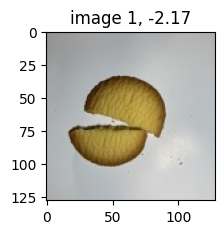

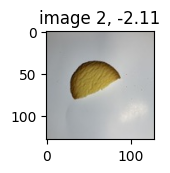

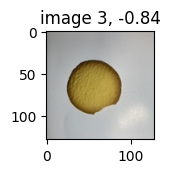

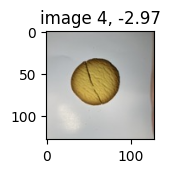

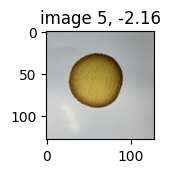

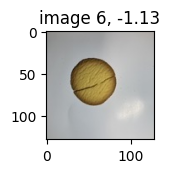

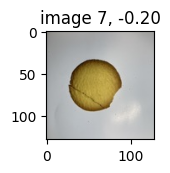

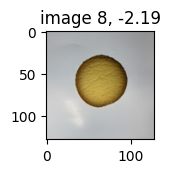

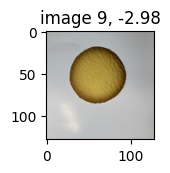

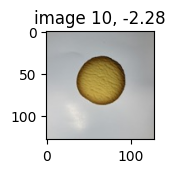

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(test_data_original)):
  plt.subplot(3, 4, i+1)
  plt.imshow(test_data_original[i])
  plt.title(f"image {i+1}")
  plt.title(f"image {i+1}, {prediction_score[i]:.2f}")

  plt.tight_layout
  plt.show()